<center><h1>1-ab: SIFT & BoW</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning : 
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.




By :

*   Balkis Bouthaina DIRAHOUI
*   Lina MEZDOUR



In [ ]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/TP1-2-data.zip
      
!unzip TP1-2-data.zip

!wget https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/code/1-ab/tools.py

--2022-10-13 13:45:39--  https://github.com/rdfia/rdfia.github.io/raw/master/data/TP1-2-data.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/TP1-2-data.zip [following]
--2022-10-13 13:45:39--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/TP1-2-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446976 (82M) [application/zip]
Saving to: ‘TP1-2-data.zip’

TP1-2-data.zip      100%[===================>]  82.44M   346MB/s    in 0.2s    

2022-10-13 13:45:42 (346 MB/s) - ‘TP1-2-data.zip’ saved [86446976/86446976]

Archive:  TP1-2-

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
%run 'tools.py'
from os.path import join

data_path = "data"

# Part 1 : SIFT

Histogram of gradient (for each pixel) , Orientation (stats of gradient orientation). 

We have :     

*   4x4 16 histograms of gradient orientation.
*   8 directions



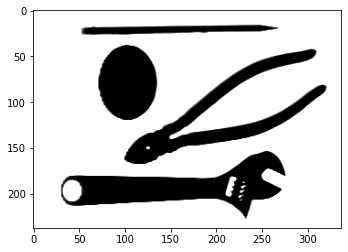

In [ ]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I ,  cmap='gray' )

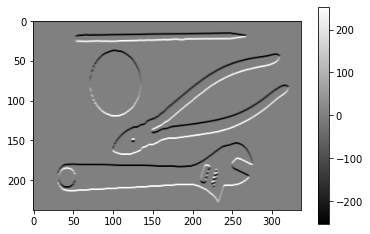

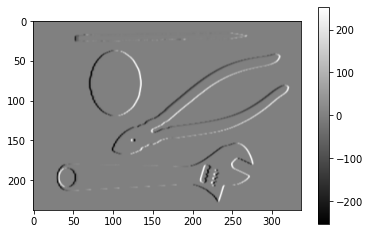

In [ ]:
def compute_grad(I):
    #input : I => image
    #output : gradiant  Ix,Iy

    #hx (3,1) * hy  (1,3) = My (3,3) (resp. Mx)
    
    h_x = 1/2 * np.asarray([-1,0,1])
    h_y = 1/2 * np.asarray([1,2,1])
    return conv_separable(I,h_y,h_x), conv_separable(I,h_x,h_y)

# Example

Ix, Iy = compute_grad(I)
plt.imshow(Ix ,  cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(Iy ,  cmap='gray')
plt.colorbar()
plt.show()


In [ ]:
def compute_grad_mod_ori(I):
    #input: I=>image
    #Output : Gn =>norm of gradient  , Go =>direction
    Ix,Iy = compute_grad(I)
    #compute norm
    Gn = np.sqrt(Ix**2+Iy**2)
    Go = compute_grad_ori(Ix,Iy,Gn)
    

    return Gn, Go

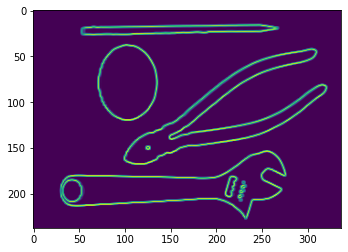

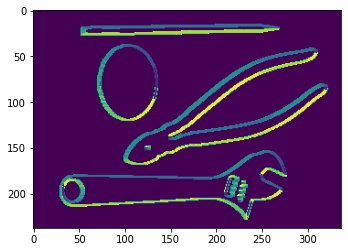

In [ ]:
Gn, Go = compute_grad_mod_ori(I)
plt.imshow(Gn)
plt.show()
plt.imshow(Go)
plt.show()

In [ ]:
def compute_histogram(g_n, g_o):

    """
    g_n and g_o are 4x4 matrices that contain the norm, and the discretized orientation.
    Warning: g_o can contain -1, those values should be discarded.
    Output : histogram of direction (8 directions)
    """
    #We gave 8 directions
    hist = np.zeros((8))

    for i,j in zip(g_n.flatten(),g_o.flatten()):
      #for each direction, discard values of g_o that contain -1
      if(j!=-1):
        #counting directions
        hist[j] =hist[j] + i
  
    return hist
  

In [ ]:
def compute_sift_region(Gn, Go, mask=None):
    #Gn : norm matrix
    #Go : direction matrix
    t_min=.5
    t_max=.2
    with_l2 = True

    patch_size = 16
    sift = np.zeros((128)) 

    if mask is not None:
        #weigh gn by N 
        Gn = Gn * mask
    
    idx = 0
    #sift sub regions (4x4 grids)
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])            
            sift[idx:idx+8] = hist
            idx += 8

    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))

    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift

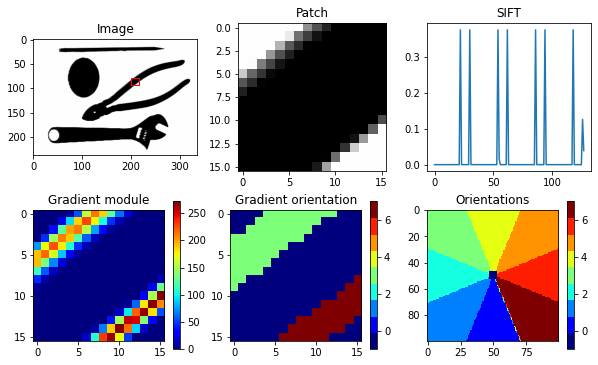

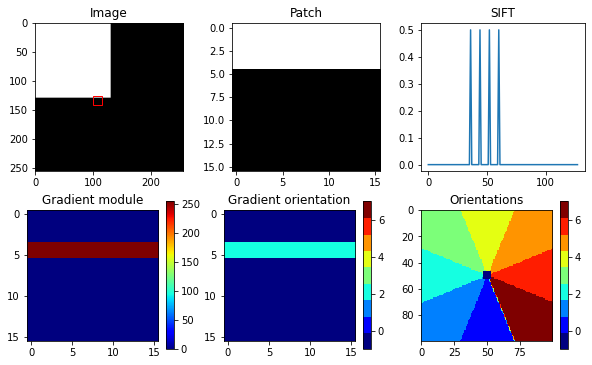

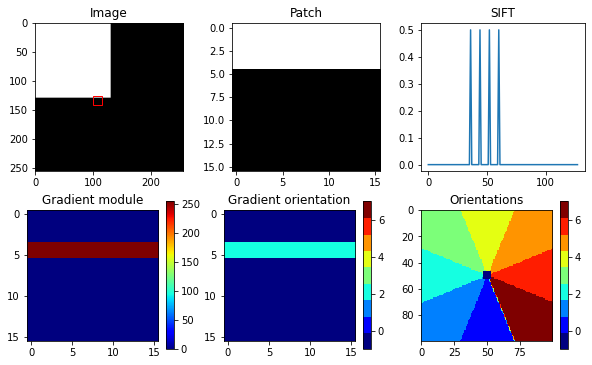

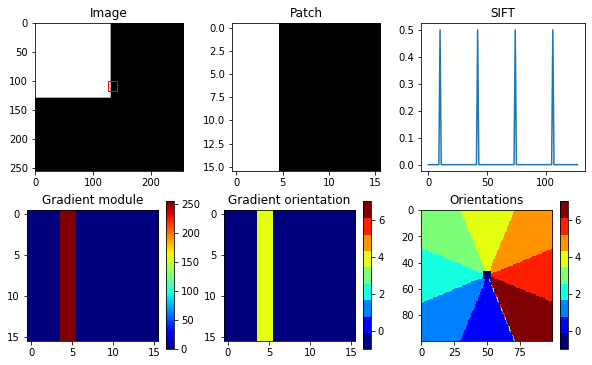

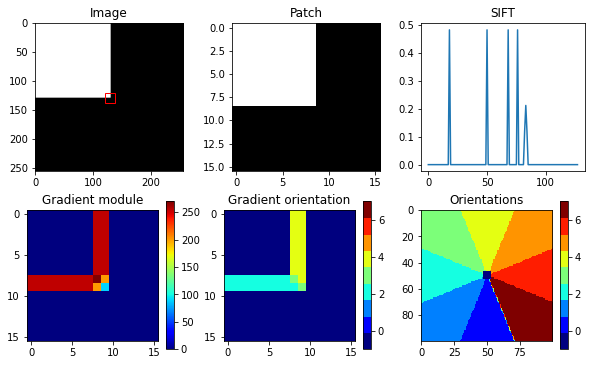

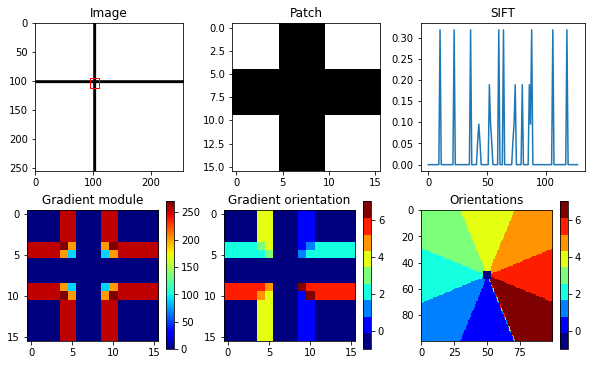

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18864812, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.3181317 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.18864

In [ ]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
sift = display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
#3rd 16 histograms (4x4 fir eacg region)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
displa[y_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [ ]:
#shape of sift is 128  (4*4(histograms) *8 (directions))
sift.shape

(128,)

In [ ]:
def compute_sift_image(I):
    """
    input : Image
    output : sifts of the image
    """
    x, y = dense_sampling(I)
    im = auto_padding(I)
    m = gaussian_mask()
  
    # Here, compute on the global image (norm, gradients)  
    Gn, Go = compute_grad_mod_ori(I)
    #128 = 16 * 8 (sift size)
    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #patches of sixteen of coords (xi,yj)
            sifts[i, j, :] = compute_sift_region(Gn[xi:xi+16, yj:yj+16], Go[xi:xi+16, yj:yj+16], mask=None)
    return sifts

# Compute SIFT

The computation can take several minutes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
max_images_per_class = None  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "/content/gdrive/MyDrive/SORBONNE/M2/RDFIA"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs
1/4485
2/4485
3/4485
4/4485
5/4485
6/4485
7/4485
8/4485
9/4485
10/4485
11/4485
12/4485
13/4485
14/4485
15/4485
16/4485
17/4485
18/4485
19/4485
20/4485
21/4485
22/4485
23/4485
24/4485
25/4485
26/4485
27/4485
28/4485
29/4485
30/4485
31/4485
32/4485
33/4485
34/4485
35/4485
36/4485
37/4485
38/4485
39/4485
40/4485
41/4485
42/4485
43/4485
44/4485
45/4485
46/4485
47/4485
48/4485
49/4485
50/4485
51/4485
52/4485
53/4485
54/4485
55/4485
56/4485
57/4485
58/4485
59/4485
60/4485
61/4485
62/4485
63/4485
64/4485
65/4485
66/4485
67/4485
68/4485
69/4485
70/4485
71/4485
72/4485
73/4485
74/4485
75/4485
76/4485
77/4485
78/4485
79/4485
80/4485
81/4485
82/4485
83/4485
84/4485
85/4485
86/4485
87/4485
88/4485
89/4485
90/4485
91/4485
92/4485
93/4485
94/4485
95/4485
96/4485
97/4485
98/4485
99/4485
100/4485
101/4485
102/4485
103/4485
104/4485
105/4485
106/4485
107/4485
108/4485
109/4485
110/4485
111/4485
112/4485
113/4485
114/4485
115/4485
116/4485
117/4485
118/4485
119/4485
120/4485
1

# Part 2 : Visual dictionnary

In [ ]:
from sklearn.cluster import KMeans
save_path = "/content/gdrive/MyDrive/SORBONNE/M2/RDFIA"
path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [ ]:
#  `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]

    # compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    kmeans = KMeans(n_clusters=n_clusters,  n_init=n_init, verbose=verbose).fit(sift)
    #get cluster centers
    clusters = kmeans.cluster_centers_
    #vdict des clusters + vecteur de zero 
    vdict = np.vstack((clusters, np.zeros((1, dim_sift))))
    return vdict


In [ ]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict


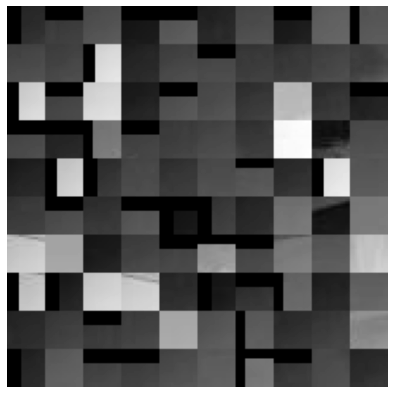

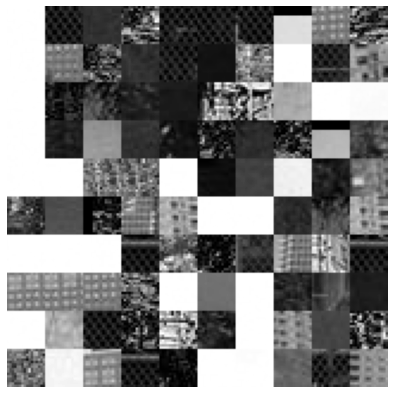

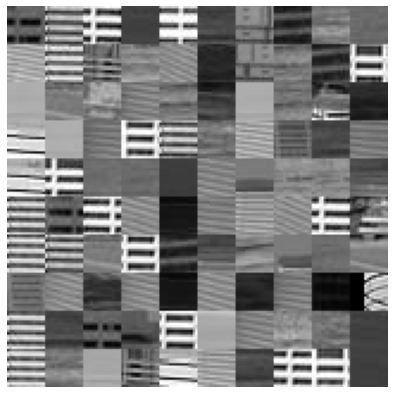

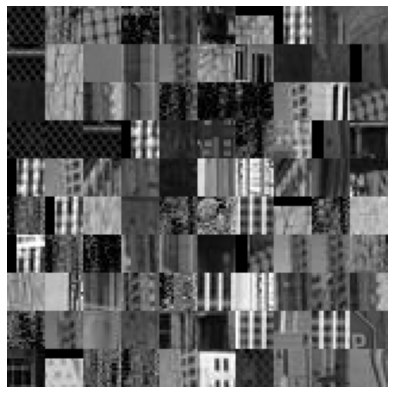

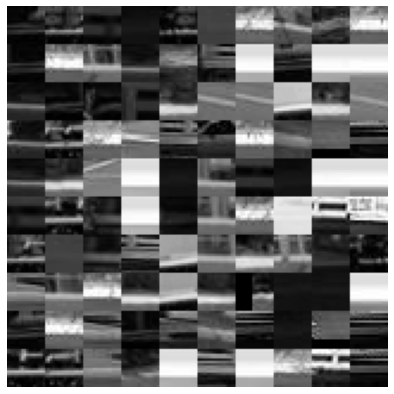

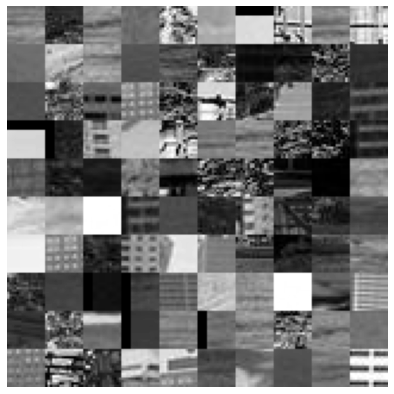

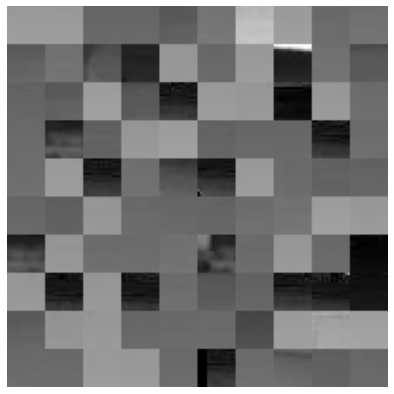

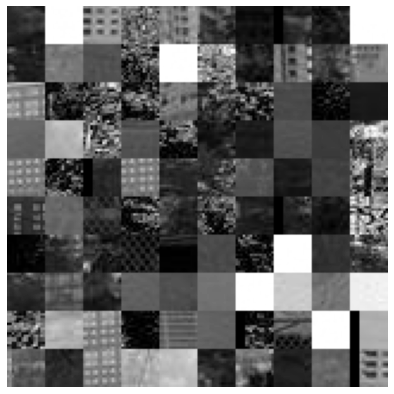

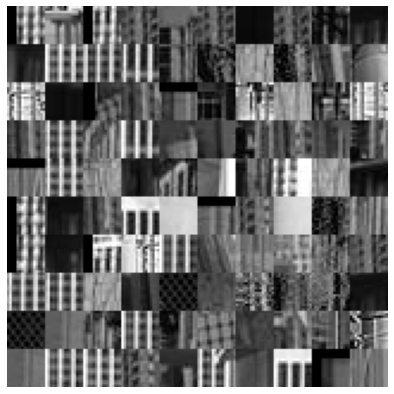

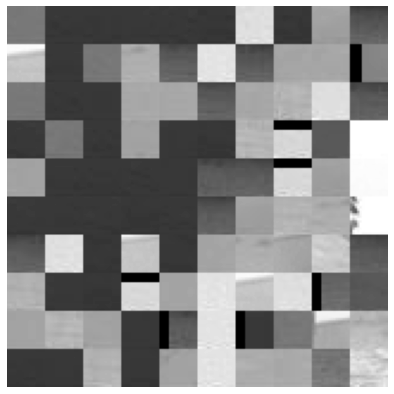

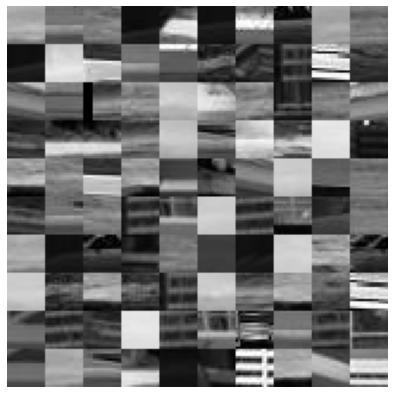

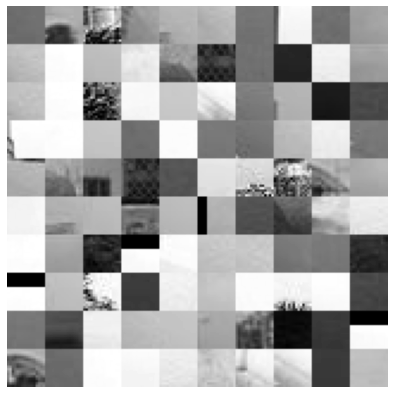

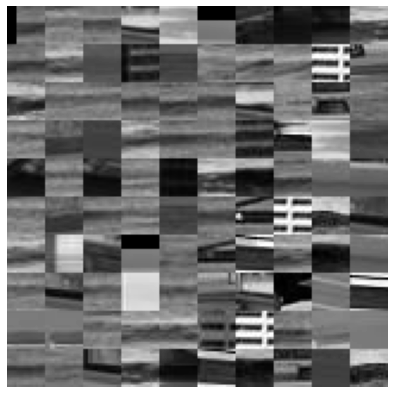

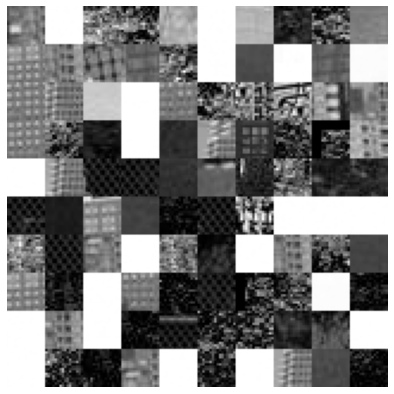

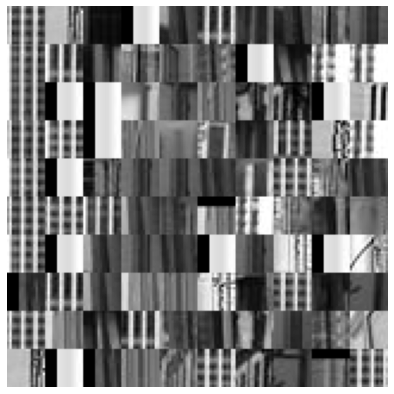

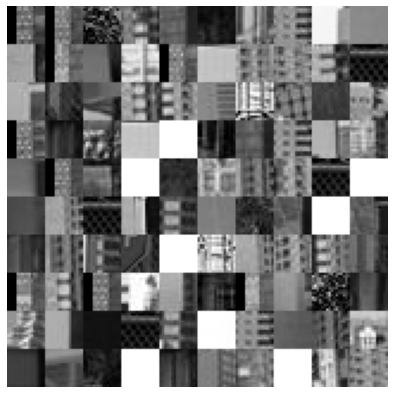

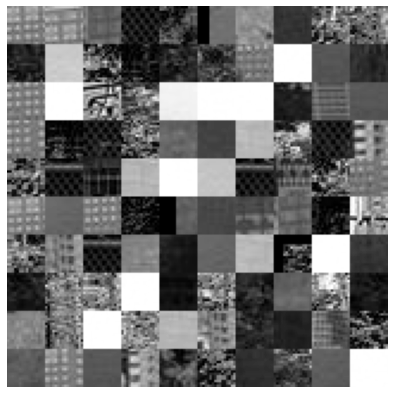

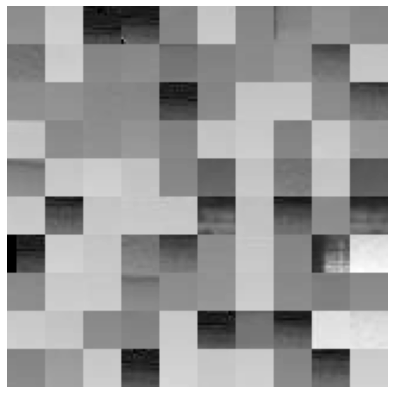

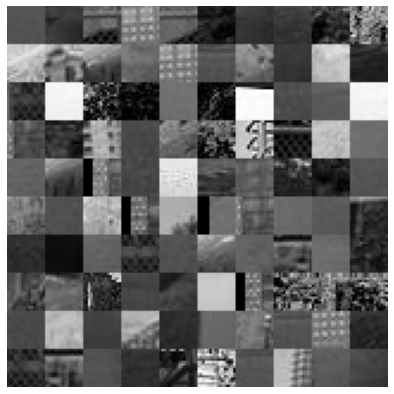

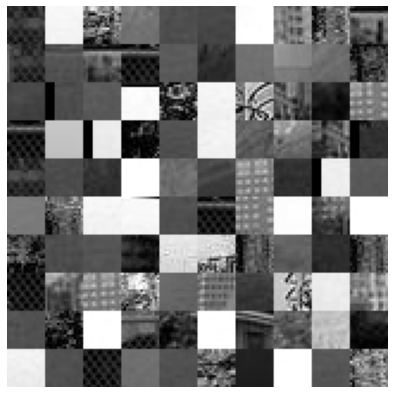

In [ ]:
# Study of the dict

# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images
# display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

centers = list(range(20))
for center in centers:
  center_vect = vdict[center]
  dist = ((sifts - center_vect)**2).sum(axis=1)
  # get best 100
  top100 = dist.argsort()[:100]
  top100_regions = regions[top100]
  display_images(top100_regions) # Show 100 random regions

# Partie 3 : BoW

In [ ]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0])

    # compute distance from image sifts to vdict
    dist = distance_matrix(sifts,vdict)
    for i in range(sifts.shape[0]):
        h_i = np.zeros((vdict.shape[0]))
        #sifts[i] - vdict[i] is the min  , le plus proche a la region du sifft
        h_i[np.argmin(dist[i])] = 1  
        #histogramme  
        feats = feats + h_i
    #normaliser les vecteurs l2
    feats /= np.linalg.norm(feats,ord=2,keepdims=True)
    return feats

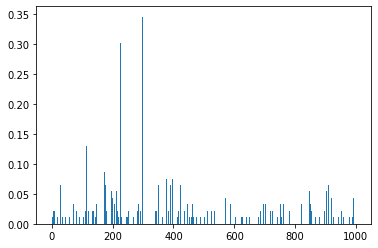

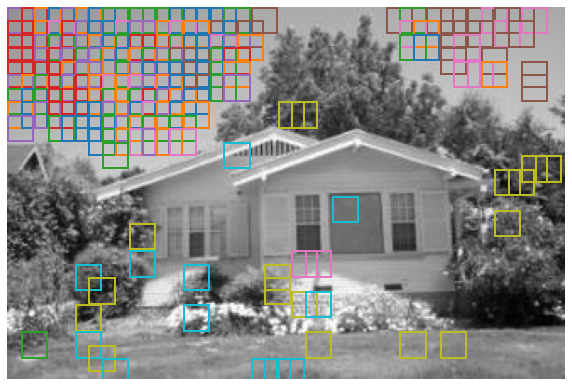

(9, 16, 16)


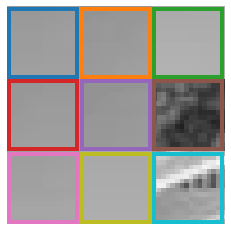

In [ ]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
sift = (sift * 255).astype('uint8')
regions = compute_regions(im)
feats = compute_feats(vdict, sift)
display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here
#histogram of occurence of the image
#image batches shown in colours, each coulour is specific code word
#below what orange the top 9 clusters